# EI2001: Ciencia de Datos en Astronomía

**Profesores:** Pía Cortés, Daniela Barrientos, Matías Suazo, Matías Mattamala

## Minitarea 2: Uso de NumPy y matplotlib

**Objetivos:**

1. Poner en práctica el uso de librerías en python (específicamente NumPy y matplotlib)
2. Familiarizarse con el concepto de ndarray
3. Realizar gráficos personalizados


**Instrucciones:**

1. Lean cuidadosamente todo lo que viene ahora
2. Para hacer esta tarea deben que hacer un **fork** del repositorio en sus cuentas de GitHub.
4. Abrir [Google Colab](https://colab.research.google.com) y seleccionar "abrir un archivo desde GitHub". Deben seleccionar su cuenta Github y escoger el repositorio que corresponde al fork que hicieron.
5. Si todo sale bien, debería abrirse una copia de este notebook en su cuenta de Google Colab.
6. Se adjuntan 6 mini actividades a completar. **TODAS** son necesarias y deben completar lo que se va pidiendo.
7. Cada vez que completen un ítem, deben guardar un avance en su fork de GitHub, de modo de **respaldar cada avance significativo**. Usen comentarios coherentes con cada respaldo "Sección 1 completa", "Tarea terminada", no solamente el que pone por defecto.



## 1. Cargar datos

Para esta minitarea trabajaremos con la fotometría de algunas estrellas. El objetivo final de esta actividad es obtener un gráfico llamado **Diagrama de Color-Magnitud (CMD)**, este es una variante del [Diagrama de Hertzsprung Russell](https://en.wikipedia.org/wiki/Hertzsprung%E2%80%93Russell_diagram) (o diagrama HR) cuyo objetivo es ver la distribución en Brillo y Color (Luminosidad y Temperatura para el diagrama HR) de las estrellas de una población. Con este se puede reconocer las distintas etapas evolutivas en las que se encuentran las estrellas, sus edades y metalicidades. 


Comienza por cargar los datos de una población sintética. En el repositorio se encuentra el archivo de texto llamado **`phot.dat`** que contiene:

1. Fotometría en las bandas B, V, R, I (magnitud aparente)
2. Temperatura ($log_{10}(T_{eff} / K)$)
3. Masa [$M_{\odot}$]
4. Distancia [pc] 


* Carga los datos a formato `ndarray` en la variable `datos` e inspecciona su forma y tamaño, como tambien las diferentes columnas.

In [2]:
import numpy as np

# Carga los datos a un ndarray

archivo = 'https://raw.githubusercontent.com/astrodatos/minitarea2/master/phot.dat'
datos = np.array(np.loadtxt(archivo))

# Inspecciona su forma y tamaño
print(format(datos))
print('\nforma:\n{}'.format(datos.shape))
print('\ntamaño:\n{}'.format(datos.size))

[[1.43318972 0.55800856 0.23628573 ... 3.7514     1.263      2.92588428]
 [3.05953348 2.22205699 1.78027236 ... 3.7411     0.972      3.02311363]
 [1.57848745 0.76497844 0.51246246 ... 3.7681     1.227      2.83983097]
 ...
 [4.79977225 4.00696032 3.57323265 ... 3.7436     0.986      7.2987171 ]
 [5.45884546 4.47140036 4.05807828 ... 3.7208     0.926      6.15482424]
 [4.23992507 3.45563476 3.01565666 ... 3.7461     1.002      6.01632559]]

forma:
(5298, 7)

tamaño:
37086


## 2. Histogramas

El siguiente paso es inspeccionar los elementos en las diferentes columnas. Para ello crearás histogramas de algunas variables de interés. 

* Haz una figura con dos gráficos, uno al lado del otro, que contengan:

    1. Un histograma con las distribuciones de las magnitudes en las bandas B y V
    2. Un histograma con la distribución de masas

No olvides poner nombres a los ejes, titulos, leyendas, etc. Se creativo en el estilo de tu gráfico!

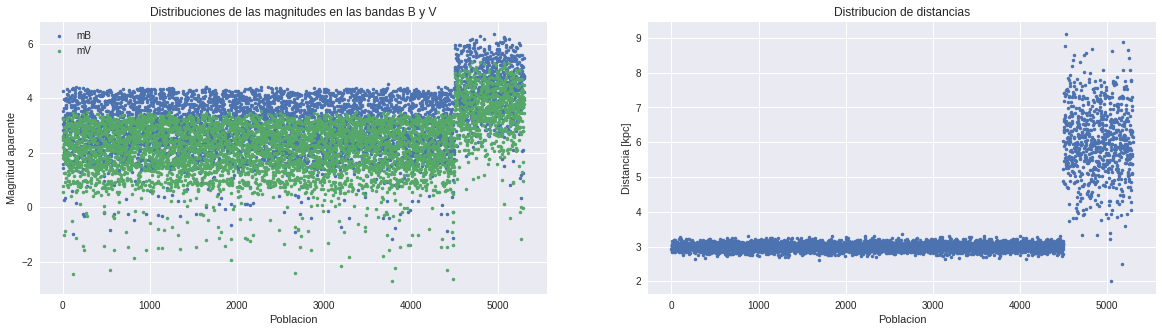

In [17]:
#Plotear histogramas de cada columna

import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize = (20,5), ncols = 2)

ax[0].plot(datos[:,0], '.', label ='mB')
ax[0].plot(datos[:,1], '.', label ='mV')
ax[0].set_title('Distribuciones de las magnitudes en las bandas B y V')
ax[0].set_xlabel('Poblacion')
ax[0].set_ylabel('Magnitud aparente')
ax[0].legend()


ax[1].plot(datos[:,6], '.')
ax[1].set_title('Distribucion de distancias')
ax[1].set_xlabel('Poblacion')
ax[1].set_ylabel('Distancia [kpc]')
ax[1].legend()


## 3. Filtrar datos

Como te habrás dado cuenta hay dos distribuciones de distancia. La mayoría de las estrellas corresponden a la población sintética creada, mientras que el resto son estrellas de fondo. Para estudiar nuestro cúmulo, primero debemos filtrar las estrellas que no pertenecen a él. 

* Haz una copia del set de datos originales en la variable `datos_filtrados` y sólo utiliza las estrellas que cumplan con un criterio basado en el histograma anterior.
* Imprime en pantalla el tamaño original del set de datos y del nuevo filtrado con el siguiente formato: _"El set original contenía X estrellas, luego de filtrar quedaron X"_


In [6]:
#Filtrar por distancia

datos_filtrados = datos[datos[:,6]<3.5].copy()

print('El set original contenia 5298 estrellas, luego de filtrar quedaron '+str(datos_filtrados.shape[0]))

El set original contenia 5298 estrellas, luego de filtrar quedaron 4506


## 4. Función Magnitud Absoluta

Para hacer el CMD necesitamos la magnitud absoluta de nuestras estrellas. Para esto crearemos una función que la calcule.

* Crea la función **`mag_abs(mag_ap, dist)`** de la siguiente forma:
    * **Input:** 
        1. `mag_ap`: ndarray de magnitudes aparentes
        2. `dist`: ndarray de distancias en unidades de [parsec]
    * **Output:**
        1. `mag_abs`: ndarray de magnitudes absolutas calculadas como: $M = m - 5 \log_{10} (d_{pc}) + 5 $

In [0]:
#Funcion mag_abs(mag, dist)

def mag_abs(mag_ap, dist):
    mag_abs = mag_ap - (5 * np.log10( dist)) + 5
    
    return mag_abs

## 5. CMD

Ahora podemos graficar nuestro Diagrama Color Magnitud. 

* Crea los siguientes arreglos:
    1. `MV`: magnitud absoluta en la banda V
    2. `color`: resta entre las magnitudes B y V (B-V)
* Grafica MV vs color como se muestra en la siguiente [figura](https://www.astro.rug.nl/~ahelmi/galaxies_course/class_II/47tuc.gif). (**Hint: pon atención a los ejes)

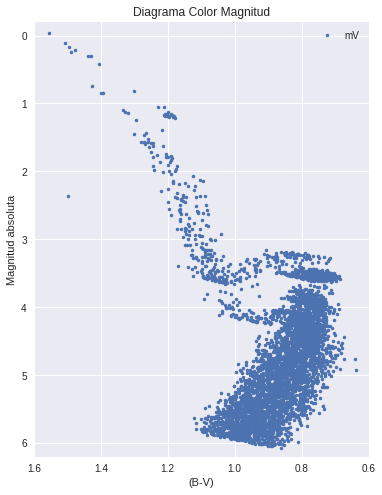

In [11]:
#Crear arrays MV y color
MV = np.array(mag_abs(datos_filtrados[:,1],datos_filtrados[:,6]))
color = np.array(datos_filtrados[:,0] - datos_filtrados[:,1])

#plot cmd
plt.figure(figsize=(6,8))
plt.plot(color, MV, '.', label ='mV')
plt.xlim(1.6, 0.6)
plt.ylim(6.2, -0.2)
plt.xlabel('(B-V)')
plt.ylabel('Magnitud absoluta')
plt.title('Diagrama Color Magnitud')
plt.legend()

## 6. Densidades y otros

Ahora crearemos gráficos con un poco más de información en color. 
* Haz una figura con dos gráficos, uno al lado del otro:
    1. `MV vs color`, poninedo las masas de cada estrella en color (recuerda la barra de colores)
    2. `MV vs color`, poniendo la Temperatura de cada estrella en color
* Haz una figura con un gráfico que contenga:
    1. [Histograma en 2D](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.hist2d.html) con ejes `MV vs color` (esta figura muestra la densidad de estrellas en el espacio `MV vs color`)
    
No olvides poner **SIEMPRE** ejes a tus figuras, titulos, leyendas, etc. Elige mapas de colores donde se noten las características de los gráficos.

(1.6, 0.6)

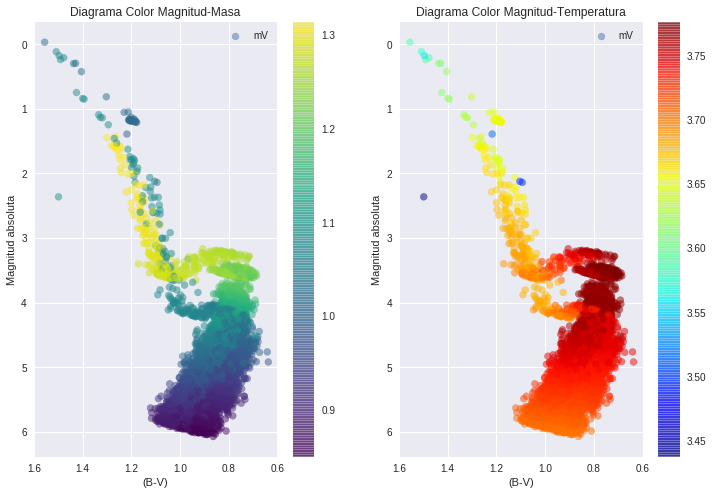

In [12]:
# plot cmd + masa / smd + temp
fig, ax = plt.subplots(figsize = (12,8), ncols = 2, sharex=True)

cb = ax[0].scatter(color, MV, label ='mV', c = datos_filtrados[:,5], alpha = 0.5, cmap='viridis')

fig.colorbar(cb, ax = ax[0])
ax[0].invert_yaxis()
ax[0].invert_xaxis()
ax[0].set_ylabel('Magnitud absoluta')
ax[0].set_xlabel('(B-V)')
ax[0].set_title('Diagrama Color Magnitud-Masa')
ax[0].legend()

cb2 = ax[1].scatter(color, MV, label ='mV', c = datos_filtrados[:,4], alpha = 0.5, cmap='jet')

fig.colorbar(cb2, ax = ax[1])
ax[1].invert_yaxis()
ax[1].invert_xaxis()
ax[1].set_ylabel('Magnitud absoluta')
ax[1].set_xlabel('(B-V)')
ax[1].set_title('Diagrama Color Magnitud-Temperatura')
ax[1].legend()
plt.xlim(1.6, 0.6)

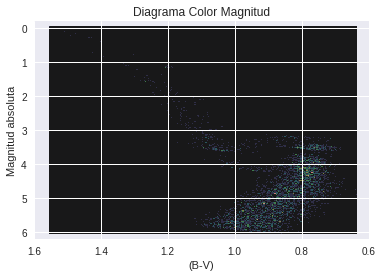

In [15]:
# plot cmd hist2D
plt.hist2d(color, MV,bins = 250, alpha = 0.9, cmap='cubehelix')
plt.xlim(1.6, 0.6)
plt.ylim(6.2, -0.2)
plt.xlabel('(B-V)')
plt.ylabel('Magnitud absoluta')
plt.title('Diagrama Color Magnitud')
plt.legend()